**Time Series Analysis**

[*********************100%%**********************]  1 of 1 completed
Mean Squared Error (MSE): 0.47
Root Mean Squared Error (RMSE): 0.69
Mean Absolute Error (MAE): 0.47
R-squared (R2) Score: -0.88
Accuracy: 0.53
Precision: 0.54
Recall: 0.64
F1 Score: 0.58


<ipython-input-2-dff52b03eef0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Price_Movement'] = np.where(df['Daily_Return'] > 0, 1, 0)
<ipython-input-2-dff52b03eef0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f'lag_{i}'] = df['Adj Close'].shift(i)
<ipython-input-2-dff52b03eef0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

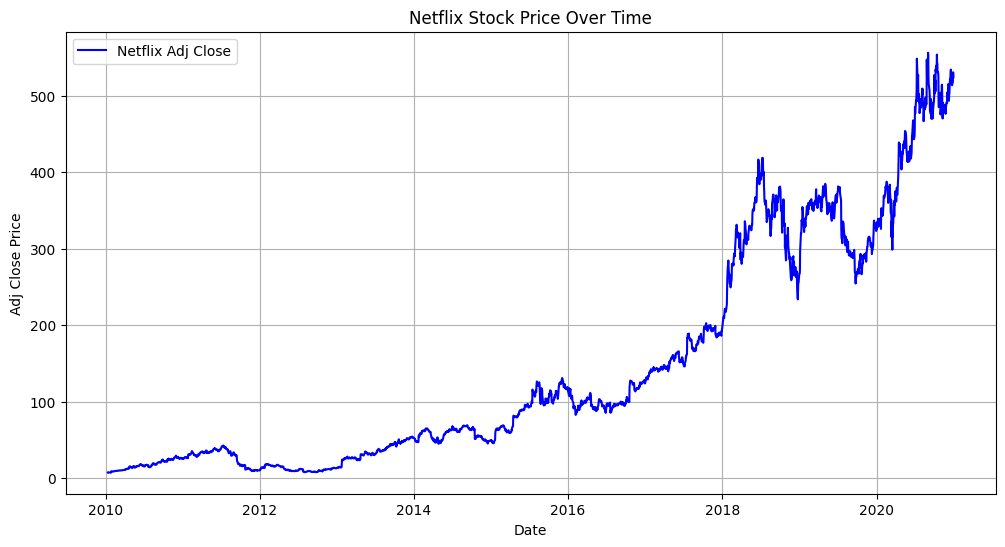

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Define the stock symbol and download historical data
stock_symbol = 'NFLX'
start_date = '2010-01-01'
end_date = '2020-12-31'

df = yf.download(stock_symbol, start=start_date, end=end_date)

# Calculate daily returns
df['Daily_Return'] = df['Adj Close'].pct_change()

# Drop missing values
df = df.dropna()

# Create binary labels based on price movement
df.loc[:, 'Price_Movement'] = np.where(df['Daily_Return'] > 0, 1, 0)

# Create lag features (use previous day's returns as predictors)
for i in range(1, 6):
    df.loc[:, f'lag_{i}'] = df['Adj Close'].shift(i)

# Drop NaN values from lag features
df = df.dropna()

# Split the data into training and testing sets
X = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['Price_Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


# Plot Netflix's adjusted closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Netflix Adj Close', color='blue')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Netflix Stock Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

**REINFORCEMENT LEARNING**

In [ ]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install gym shimmy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 23.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
from gym import spaces

# Define the stock symbol and download historical data
stock_symbol = 'NFLX'
start_date = '2010-01-01'
end_date = '2020-12-31'

df = yf.download(stock_symbol, start=start_date, end=end_date)

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


[*********************100%%**********************]  1 of 1 completed


In [ ]:
class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        self.df = df
        self.action_space = spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(df.columns),), dtype=np.float32)
        self.current_step = 0
        self.current_balance = 10000  # Starting balance
        self.initial_balance = self.current_balance

    def reset(self):
        self.current_step = 0
        self.current_balance = self.initial_balance
        self.current_stock_holding = 0
        self.stock_price_history = self.df['Adj Close'].values
        self.state = self.df.iloc[self.current_step].values
        return self.state

    def step(self, action):
        self.current_step += 1
        done = False

        if self.current_step >= len(self.df) - 1:
            done = True

        # Execute the action (Buy, Sell, or Hold)
        if action == 0:  # Buy
            if self.current_balance > self.stock_price_history[self.current_step]:
                self.current_stock_holding += 1
                self.current_balance -= self.stock_price_history[self.current_step]
        elif action == 1:  # Sell
            if self.current_stock_holding > 0:
                self.current_stock_holding -= 1
                self.current_balance += self.stock_price_history[self.current_step]

        # Calculate the reward based on the change in portfolio value
        portfolio_value = self.current_balance + self.current_stock_holding * self.stock_price_history[self.current_step]
        prev_portfolio_value = self.current_balance + self.current_stock_holding * self.stock_price_history[self.current_step - 1]
        reward = portfolio_value - prev_portfolio_value

        # Update the state
        self.state = self.df.iloc[self.current_step].values

        return self.state, reward, done, {}

# Create and initialize the custom RL environment
env = StockTradingEnv(df)
env = DummyVecEnv([lambda: env])

# Define and train the PPO agent
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=int(1e5))

# Initialize variables to keep track of performance
cumulative_returns = []
episode_rewards = []

# Number of episodes for evaluation
num_eval_episodes = 10

for _ in range(num_eval_episodes):
    obs = env.reset()
    done = False
    episode_return = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_return += reward

    cumulative_returns.append(episode_return)
    episode_rewards.append(episode_return)

# Calculate and print evaluation metrics
mean_return = np.mean(cumulative_returns)
std_return = np.std(cumulative_returns)
sharpe_ratio = mean_return / std_return if std_return > 0 else 0.0

print(f"Mean cumulative return: {mean_return:.2f}")
print(f"Std deviation of cumulative return: {std_return:.2f}")
print(f"Sharpe ratio: {sharpe_ratio:.2f}")


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 394  |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 292         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013087754 |
|    clip_fraction        | 0.0889      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -1.19e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 963         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0031     |
|    value_loss           | 3.41e+03    |
-----------------------------------------
-----------------

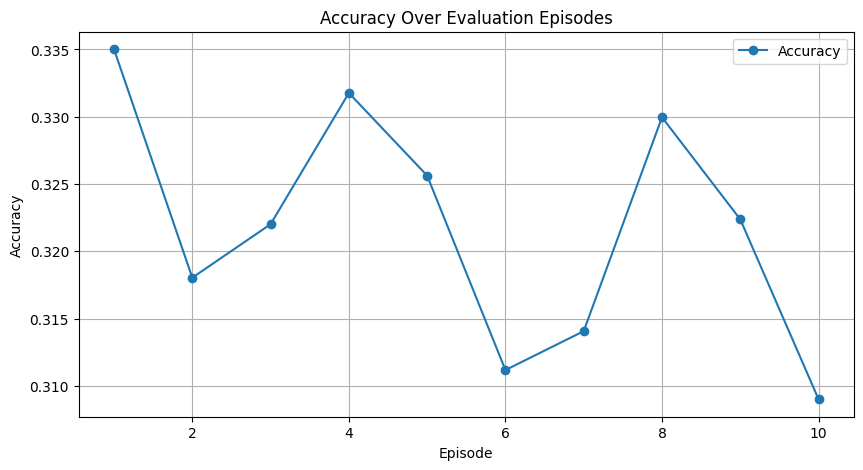

Accuracy: 0.31


In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and precision values
accuracy_values = []
precision_values = []

# Number of episodes for evaluation
num_eval_episodes = 10

for _ in range(num_eval_episodes):
    obs = env.reset()
    done = False

    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    while not done:
        action, _ = model.predict(obs)
        obs, _, done, _ = env.step(action)

        # Access the state information from the observation
        current_stock_holding = obs[0][-1]  # Assuming the last element of the state contains the stock holding

        # Determine the true and predicted trading decisions (Buy or Not Buy)
        true_decision = 1 if current_stock_holding > 0 else 0  # True decision based on holding
        predicted_decision = action  # Predicted decision from the RL agent

        # Update counts for accuracy and precision
        if true_decision == 1:
            if predicted_decision == 1:
                true_positive += 1
            else:
                false_negative += 1
        else:
            if predicted_decision == 1:
                false_positive += 1
            else:
                true_negative += 1

    # Calculate accuracy and precision for the episode
    total_samples = true_positive + false_positive + true_negative + false_negative
    accuracy = (true_positive + true_negative) / total_samples if total_samples > 0 else 0.0

    # Append accuracy and precision to the lists
    accuracy_values.append(accuracy)


# Create a plot for accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_eval_episodes + 1), accuracy_values, label='Accuracy', marker='o', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Evaluation Episodes')
plt.legend()
plt.grid()

# Show both plots
plt.show()

print(f"Accuracy: {accuracy:.2f}")

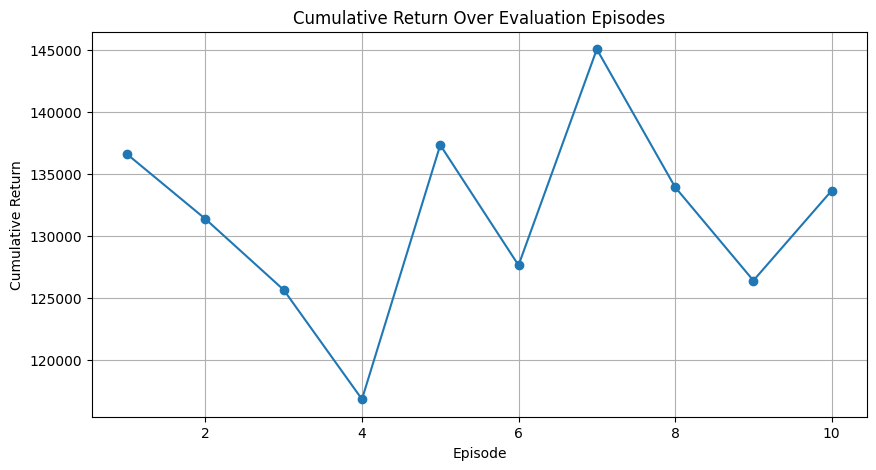

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store cumulative returns
cumulative_returns = []

# Number of episodes for evaluation
num_eval_episodes = 10

for _ in range(num_eval_episodes):
    obs = env.reset()
    done = False
    episode_return = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        episode_return += reward

    cumulative_returns.append(episode_return)

# Create a plot for cumulative returns
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_eval_episodes + 1), cumulative_returns, marker='o', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Evaluation Episodes')
plt.grid()

# Show the plot
plt.show()


**LSTM**

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 1s 918ms/step
RMSE for the entire dataset: 8.171513376454877
Mean Absolute Error (MAE) for the entire dataset: 6.38
Accuracy for the entire dataset: 98.32%


<ipython-input-3-96d0f36d060e>:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


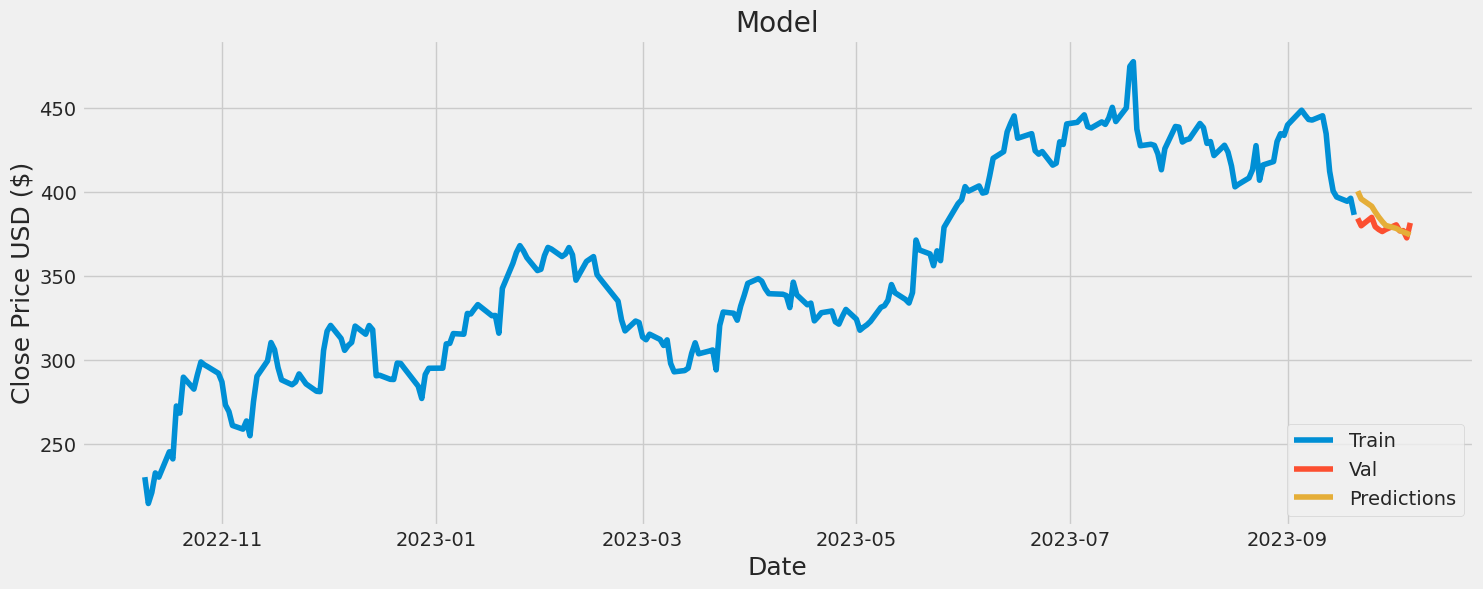

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

yf.pdr_override()

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download Netflix stock data
netflix = yf.download('NFLX', start, end)

# Create a new dataframe with only the 'Close' column
data = netflix.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

print(f"RMSE for the entire dataset: {rmse}")
print(f"Mean Absolute Error (MAE) for the entire dataset: {mae:.2f}")

# Calculate accuracy
accuracy = 100 - (mae / y_test.mean()) * 100
print(f"Accuracy for the entire dataset: {accuracy:.2f}%")

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


**Prophet**

[*********************100%%**********************]  1 of 1 completed


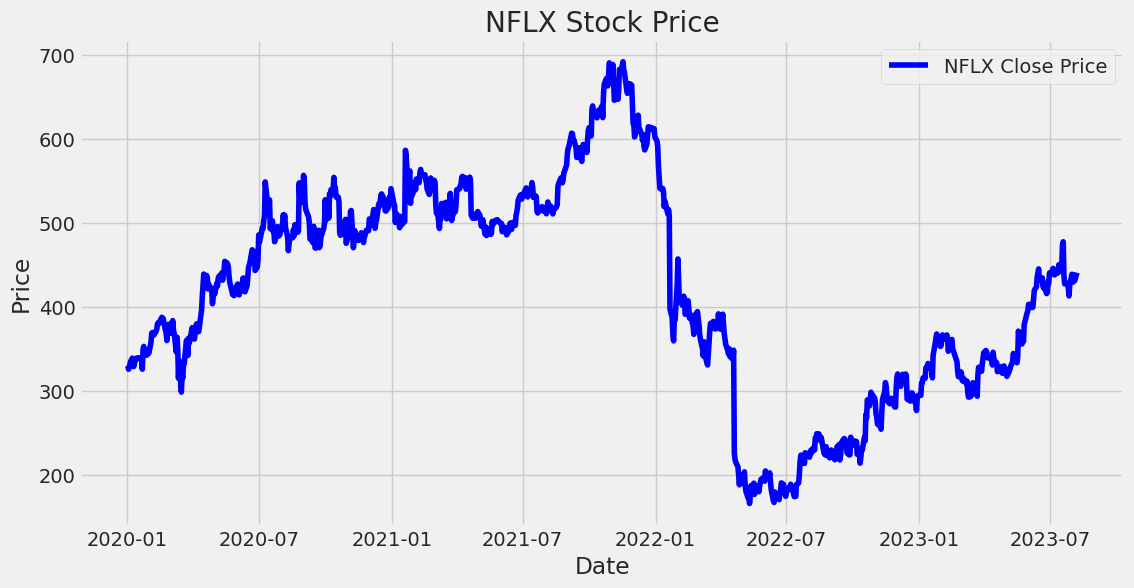

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphcb5qx8c/7pn8x981.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphcb5qx8c/3dg0tmk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56290', 'data', 'file=/tmp/tmphcb5qx8c/7pn8x981.json', 'init=/tmp/tmphcb5qx8c/3dg0tmk0.json', 'output', 'file=/tmp/tmphcb5qx8c/prophet_modelpmojttvz/prophet_model-20231008032447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:24:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:24:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


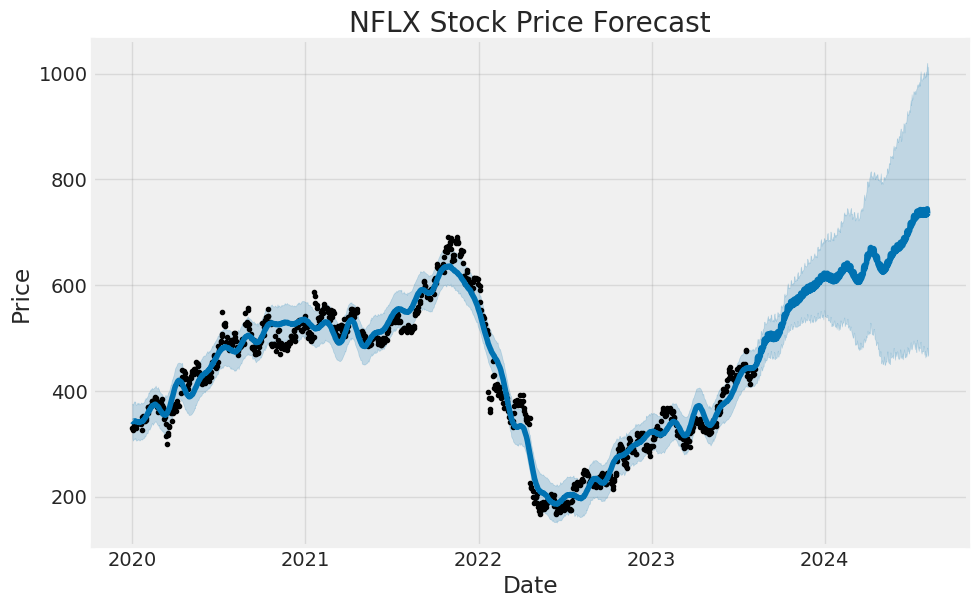

Mean Squared Error (MSE): 724.82
Root Mean Squared Error (RMSE): 26.92
Mean Absolute Error (MAE): 21.46
Accuracy: 94.88%


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

# Fetch stock data using yfinance
def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

# Plot stock data
def plot_stock_data(stock_data, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label=f'{symbol} Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{symbol} Stock Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Prepare data for Prophet
def prepare_data_for_prophet(stock_data):
    df = stock_data.reset_index()
    df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
    return df

# Train Prophet model
def train_prophet_model(df):
    model = Prophet()
    model.fit(df)
    return model

# Make predictions using Prophet
def make_prophet_predictions(model, future):
    forecast = model.predict(future)
    return forecast

# Calculate and print evaluation metrics
def evaluate_predictions(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

    accuracy = 100 - (mae / y_true.mean()) * 100
    print(f"Accuracy: {accuracy:.2f}%")


def main():
    # User inputs
    symbol = 'NFLX'
    start_date = '2020-01-01'
    end_date = '2023-08-08'

    # Fetch stock data
    stock_data = fetch_stock_data(symbol, start_date, end_date)

    # Plot stock data
    plot_stock_data(stock_data, symbol)

    # Prepare data for Prophet
    df = prepare_data_for_prophet(stock_data)

    # Train Prophet model
    model = train_prophet_model(df)

    # Create future dates for prediction
    future = model.make_future_dataframe(periods=365)

    # Make predictions using Prophet
    forecast = make_prophet_predictions(model, future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'{symbol} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    # Extract actual and predicted values
    actual_values = stock_data['Close'].values
    predicted_values = forecast['yhat'].values[:-365]  # Exclude the future dates

    # Evaluate predictions
    evaluate_predictions(actual_values, predicted_values)

if __name__ == "__main__":
    main()